In [1]:
# Get thinkdsp.py

import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate, read_wave, Spectrum, Wave

def serial_corr (wave, lag=1):
  N = len (wave)
  y1 = wave.ys[lag:]
  y2 = wave.ys[:N-lag]
  corr = np.corrcoef(y1, y2)[0, 1]
  return corr

def autocorr (wave):
  lags = range(len(wave.ys)//2)
  corrs = [serial_corr(wave, lag) for lag in lags]
  return lags, corrs

In [2]:
def estimate_fundamental(segment, low=50, high=200):
  lags, corrs = autocorr(segment)
  lag = np.array(corrs[low:high]).argmax() + low
  period = lag / segment.framerate
  frequency = 1 / period
  return frequency

In [3]:
wave = read_wave('28042__bcjordan__voicedownbew.wav')
segment = wave.segment(start=0.7, duration=0.05)
estimate_fundamental(segment)

344.53125

In [4]:
duration = wave.duration
step = 0.05
start = 0
time = []
freq = []
while start + step < duration:
  time.append(start + step/2)
  freq.append(estimate_fundamental(wave.segment(start=start,duration=step)))
  start += step

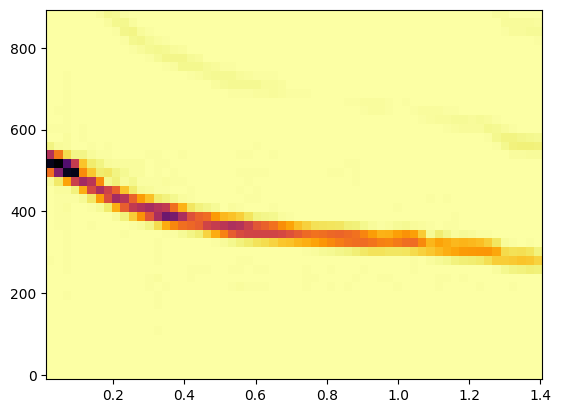

In [5]:
wave.make_spectrogram(2048).plot(high=900)